# TITANIC SURVIVAL PREDICTION

## Importing Numpy & Pandas for data processing and seaborn and matplotlib for visualization

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading and Displaying the Titanic Dataset

In [7]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Statistical Summary of the Titanic Dataset

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Types of Columns in Dataset

In [250]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Checking for Missing Values in the Dataset

In [252]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Filling Missing Values in the 'Age' Column with Mean

In [344]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

### First 10 Values of the 'Age' Column in Dataset

In [346]:
df['Age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

### Checking for Remaining Missing Values in the 'Age' Column

In [348]:
df['Age'].isnull().sum()

0

### Checking for Missing Values in the 'Embarked' Column

In [350]:
df['Embarked'].isnull().sum()

2

### Filling Missing Values in the 'Embarked' Column with Mode

In [352]:
mode_value = df['Embarked'].mode()

if not mode_value.empty:
    df['Embarked'] = df['Embarked'].fillna(mode_value[0])
else:
    print("No mode found for the 'Embarked' column")

### Dropping the 'Cabin' Column from Dataset

In [354]:
df.drop(columns=['Cabin'],inplace=True)

### Checking for Remaining Missing Values After Dropping Columns

In [356]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Aggregating Survival Counts by Passenger Class

In [482]:
df.groupby('Pclass').agg({
    'Survived' : 'value_counts'
})

Survived
Pclass Survived          
1      1              136
       0               80
2      0               97
       1               87
3      0              372
       1              119

### Counting the Number of Occurrences of Each Gender

In [446]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

### Aggregating Survival Counts by Gender

In [470]:
df.groupby('Sex').agg({
    'Survived' : 'value_counts'
})

Survived
Sex    Survived          
female 1              233
       0               81
male   0              468
       1              109

## Visualization

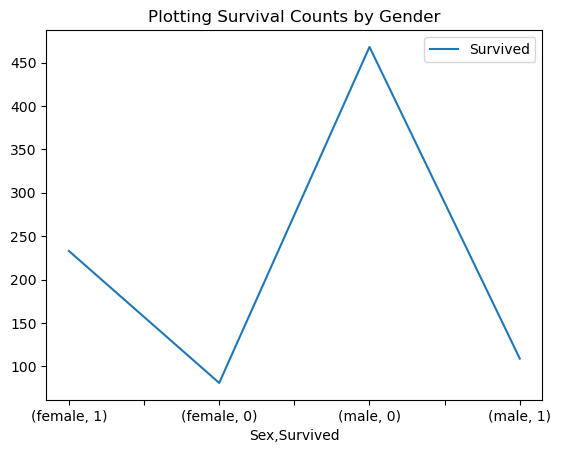

In [32]:
df.groupby('Sex').agg({
    'Survived' : 'value_counts'
}).plot()
plt.title('Plotting Survival Counts by Gender')
plt.show()

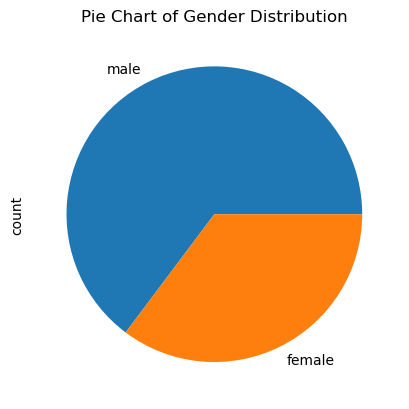

In [34]:
df['Sex'].value_counts().plot(kind='pie',)
plt.title('Pie Chart of Gender Distribution')
plt.show()

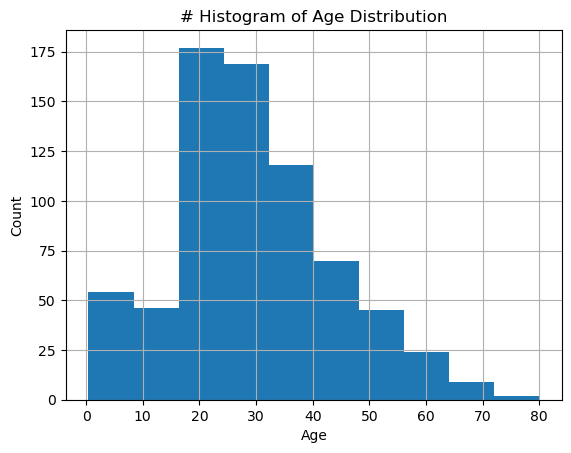

In [36]:
df['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("# Histogram of Age Distribution")
plt.show()

Text(0.5, 1.0, 'Heatmap of Correlation Matrix for Numeric Columns')

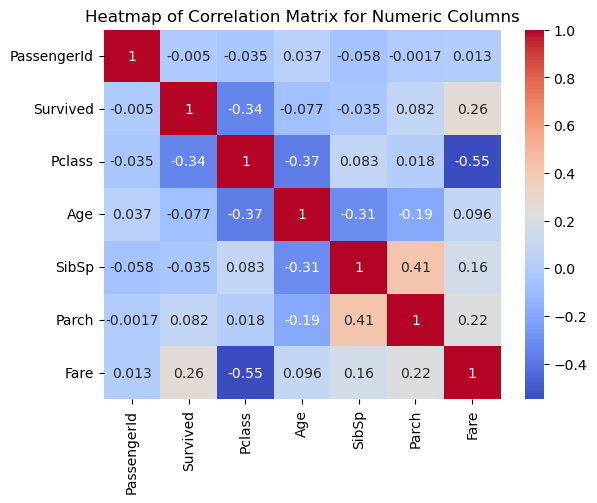

In [42]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix for Numeric Columns')

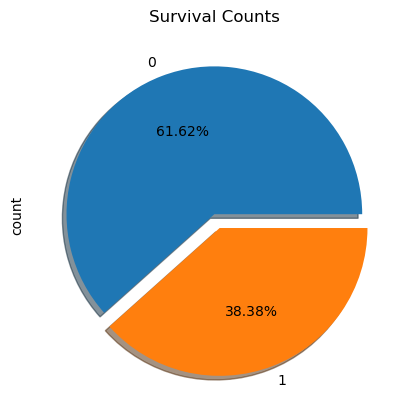

In [48]:
df.Survived.value_counts().plot(kind = 'pie', autopct="%0.2f%%", shadow=True, explode=[0,0.1], title='Survival Counts')
plt.show()

### Importing LabelEncoder for Categorical Encoding

In [274]:
from sklearn.preprocessing import LabelEncoder

### Encoding 'Sex' Column with LabelEncoder

In [276]:
labelEncoder_sex = LabelEncoder()
df['Sex'] = labelEncoder_sex.fit_transform(df['Sex'])

### Encoding 'Embarked' Column with LabelEncoder

In [278]:
labelEncoder_Embarked = LabelEncoder()
df['Sex'] = labelEncoder_Embarked.fit_transform(df['Embarked'])

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 73.2+ KB


## Preparing Features and Target for Modeling

In [312]:
X = df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket'])
y = df['Survived']

### Features DataFrame

In [314]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,22.000000,1,0,7.2500,S
1,1,0,38.000000,1,0,71.2833,C
2,3,2,26.000000,0,0,7.9250,S
3,1,2,35.000000,1,0,53.1000,S
4,3,2,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,2,27.000000,0,0,13.0000,S
887,1,2,19.000000,0,0,30.0000,S
888,3,2,29.699118,1,2,23.4500,S
889,1,0,26.000000,0,0,30.0000,C


### Target Series

In [316]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Importing train_test_split for Data Splitting

In [290]:
from sklearn.model_selection import train_test_split

### Splitting Data into Training and Testing Sets

In [320]:
X_train,y_train, X_test, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Shape of the Training Features DataFrame

In [322]:
X_train.shape

(712, 7)

### Shape of the Testing Features DataFrame

In [324]:
X_test.shape

(712,)

### Importing LogisticRegression for Classification

In [326]:
from sklearn.linear_model import LogisticRegression

### Initializing Logistic Regression Model

In [360]:
model = LogisticRegression(max_iter=1000)

### Training the Logistic Regression Model

In [362]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Making Predictions with the Logistic Regression Model

In [390]:
prediction = model.predict(X_test)

## Importing Metrics for Model Evaluation

In [408]:
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

### Calculating and Printing Model Accuracy

In [400]:
accuracy = accuracy_score(y_test, prediction)
print(f'accuracy: {accuracy}')

accuracy: 0.8100558659217877


### Confusion Matrix

In [412]:
print('confution matrix:')
print(confusion_matrix(y_test, prediction))

confution matrix:
[[90 15]
 [19 55]]


### Classification Report

In [420]:
print('classification Report')
print(classification_report(y_test, prediction))

classification Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

